## Learning the XOR Function Problem Example

To solve the XOR problem example we use the three-neuron network
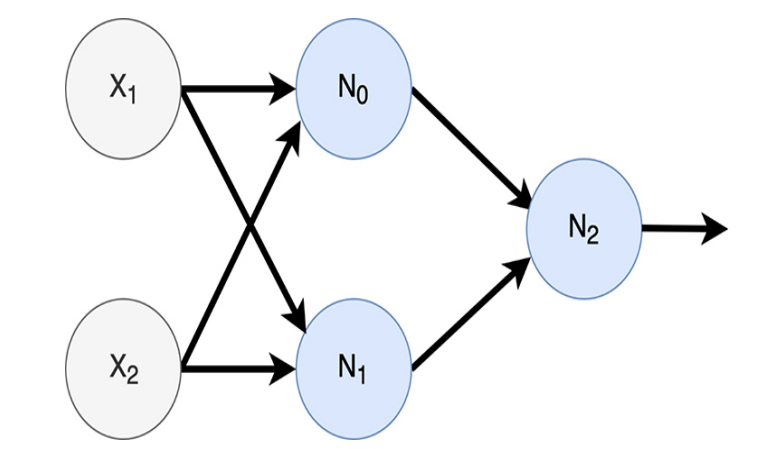


The figure above shows neurons N0, N1, and N2. We have omitted the bias inputs and not stated the weights in
the figure. We use tanh as an activation function for N0 and N1 and the
logistic sigmoid function as an activation function for the output neuron N2, and we use MSE as the loss function

In [ ]:
import numpy as np

np.random.seed(3) # To make repeatable
LEARNING_RATE = 0.1
index_list = [0,1,2,3] # Used to randomize order

# Define training examples.
x_train = [np.array([1.0, -1.0, -1.0]),
           np.array([1.0, -1.0, 1.0]),
           np.array([1.0, 1.0, -1.0]),
           np.array([1.0, 1.0, 1.0])]
y_train = [0.0, 1.0, 1.0, 1.0, 0.0] 

- Since logistic sigmoid function used in activation function for the output neuron, the ground truth is changed to be 0.0 and 1.0 for the training examples.

(logistic sigmoid function output range does not go to −1.0)

- Next, the variables are declared to hold the state of our three neurons 

In [ ]:
def neuron_w(input_count):
  weights = np.zeros(input_count+1)
  for i in range(1, (input_count+1)):
    weights[i] = np.random.uniform(-1.0, 1.0)
  return weights

n_w = [neuron_w(2), neuron_w(2), neuron_w(2)]
n_y = [0,0,0]
n_error = [0,0,0]

These are all the state variables that we need for each neuron for both the
forward pass and the backward pass: 

- weights (n_w), 
- output (n_y),
- error term (n_error). 

The input weights initialized to random
numbers between −1.0 and 1.0, and we set the bias weights to 0.0. 

The reason to randomly initialize the input weights is to break the symmetry.

If all neurons start with the same initial weights, then the initial output of all neurons in a layer would also be identical. This in turn would lead to all
neurons in the layer behaving the same during backpropagation, and they
would all get the same weight adjustments

- The code below starts with a function to print all the nine weights of the
network. 

- The **forward_pass** function first computes the outputs of neurons 0 and 1 with
the same inputs and then puts their
outputs into an array, together with a bias value of 1.0, to use as input to
neuron 2. 

- This function defines the topology of the network.

- The tanh used for the neurons in the first layer and the logistic sigmoid function for the output neuron.

- The **backward_pass** function starts by computing the derivative of the error
function and then computes the derivative of the activation function for
the output neuron.

- Finally, the **adjust_weights** function adjusts the weights for each of the three neurons.


In [ ]:
def show_learning():
    print('Current weights:')
    for i, w in enumerate(n_w):
        print('neuron ', i, ': w0 =', '%5.2f' % w[0],
              ', w1 =', '%5.2f' % w[1], ', w2 =',
              '%5.2f' % w[2])
    print('----------------')

def forward_pass(x):
    global n_y
    n_y[0] = np.tanh(np.dot(n_w[0], x)) # Neuron 0
    n_y[1] = np.tanh(np.dot(n_w[1], x)) # Neuron 1
    n2_inputs = np.array([1.0, n_y[0], n_y[1]]) # 1.0 is bias
    z2 = np.dot(n_w[2], n2_inputs)
    n_y[2] = 1.0 / (1.0 + np.exp(-z2))

def backward_pass(y_truth):
    global n_error
    error_prime = -(y_truth - n_y[2]) # Derivative of loss-func
    derivative = n_y[2] * (1.0 - n_y[2]) # Logistic derivative
    n_error[2] = error_prime * derivative
    derivative = 1.0 - n_y[0]**2 # tanh derivative
    n_error[0] = n_w[2][1] * n_error[2] * derivative
    derivative = 1.0 - n_y[1]**2 # tanh derivative
    n_error[1] = n_w[2][2] * n_error[2] * derivative

def adjust_weights(x):
    global n_w
    n_w[0] -= (x * LEARNING_RATE * n_error[0])
    n_w[1] -= (x * LEARNING_RATE * n_error[1])
    n2_inputs = np.array([1.0, n_y[0], n_y[1]]) # 1.0 is bias
    n_w[2] -= (n2_inputs * LEARNING_RATE * n_error[2])

### Training Loop to Learn the XOR Function with Backpropagation

- We pick training examples in random order, call the functions **forward_pass**, **backward_pass**, and **adjust_weights**, and then print out the weights with the function **show_learning**.

- Once we have looped
through all four training examples, we check whether the network can
predict them all correctly, and if not, we do another pass over them in
random order.


In [ ]:
all_correct = False
while not all_correct: # Train until converged
    all_correct = True
    np.random.shuffle(index_list) # Randomize order
    for i in index_list: # Train on all examples
        forward_pass(x_train[i])
        backward_pass(y_train[i])
        adjust_weights(x_train[i])
        show_learning() # Show updated weights
    for i in range(len(x_train)): # Check if converged
        forward_pass(x_train[i])
        print('x1 =', '%4.1f' % x_train[i][1], ', x2 =',
              '%4.1f' % x_train[i][2], ', y =',
              '%.4f' % n_y[2])
        if(((y_train[i] < 0.5) and (n_y[2] >= 0.5))
                or ((y_train[i] >= 0.5) and (n_y[2] < 0.5))):
            all_correct = False

Current weights:
neuron  0 : w0 =  0.01 , w1 =  0.11 , w2 =  0.41
neuron  1 : w0 =  0.01 , w1 = -0.41 , w2 =  0.01
neuron  2 : w0 =  0.01 , w1 =  0.78 , w2 =  0.79
----------------
Current weights:
neuron  0 : w0 =  0.00 , w1 =  0.12 , w2 =  0.41
neuron  1 : w0 =  0.00 , w1 = -0.40 , w2 =  0.02
neuron  2 : w0 =  0.00 , w1 =  0.79 , w2 =  0.78
----------------
Current weights:
neuron  0 : w0 =  0.01 , w1 =  0.13 , w2 =  0.42
neuron  1 : w0 =  0.01 , w1 = -0.39 , w2 =  0.03
neuron  2 : w0 =  0.01 , w1 =  0.79 , w2 =  0.78
----------------
Current weights:
neuron  0 : w0 =  0.02 , w1 =  0.12 , w2 =  0.43
neuron  1 : w0 =  0.01 , w1 = -0.40 , w2 =  0.03
neuron  2 : w0 =  0.02 , w1 =  0.80 , w2 =  0.78
----------------
x1 = -1.0 , x2 = -1.0 , y = 0.4797
x1 = -1.0 , x2 =  1.0 , y = 0.6451
x1 =  1.0 , x2 = -1.0 , y = 0.3754
x1 =  1.0 , x2 =  1.0 , y = 0.5415
Current weights:
neuron  0 : w0 =  0.02 , w1 =  0.11 , w2 =  0.43
neuron  1 : w0 =  0.02 , w1 = -0.40 , w2 =  0.04
neuron  2 : w0 =  0.0

**The last four lines show** the predicted output y for each x1, x2
combination, and we see that it implements the XOR function, since the
output is greater than 0.5 when only one of the inputs is positive, which is
exactly the XOR function.
